In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [6]:
df = pd.read_csv('C:/Users/ajean/Documents/proyecto-data-science/DATASETS/DATASET_QUINCENAS_CLUSTER.csv', sep=';', decimal=',')

In [7]:
df.head()

,Grupo,Casos Covid,Tem. Media,Gasto Medio
0,Barcelona-2022-6-1,177644,20.14,160
1,Barcelona-2022-6-2,180192,22.78,166
2,Barcelona-2022-7-1,202880,24.28,164
3,Barcelona-2022-7-2,312793,24.89,166
4,Barcelona-2022-8-1,183761,25.41,157


In [8]:
df.columns

Index(['Grupo', 'Casos Covid', 'Tem. Media', 'Gasto Medio'], dtype='object')

In [9]:
df2 = df.groupby('Grupo')
df2.head()

,Grupo,Casos Covid,Tem. Media,Gasto Medio
0,Barcelona-2022-6-1,177644,20.14,160
1,Barcelona-2022-6-2,180192,22.78,166
2,Barcelona-2022-7-1,202880,24.28,164
3,Barcelona-2022-7-2,312793,24.89,166
4,Barcelona-2022-8-1,183761,25.41,157
5,Barcelona-2022-8-2,181212,23.99,159
6,Girona-2022-6-1,23261,19.68,160
7,Girona-2022-6-2,23078,22.86,166
8,Girona-2022-7-1,25169,24.23,164
9,Girona-2022-7-2,39452,24.59,166


In [10]:
num_vars = ['Casos Covid', 'Tem. Media', 'Gasto Medio']

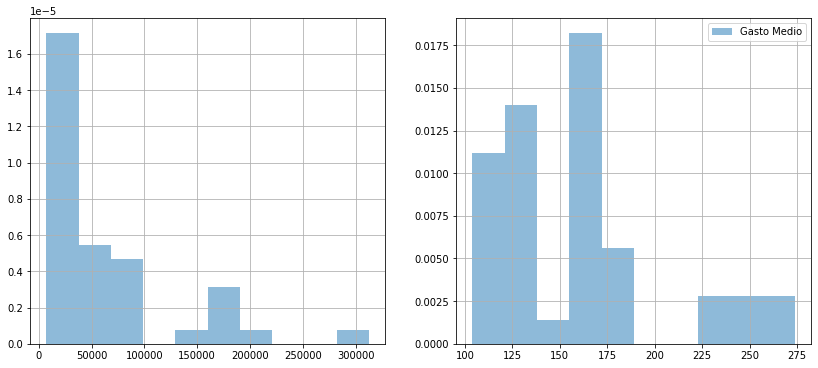

In [11]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
df['Casos Covid'].hist(bins=10,label='Casos Covid',alpha=0.5, density=True, ax=ax[0])
df['Gasto Medio'].hist(bins=10,label='Gasto Medio',alpha=0.5, density=True, ax= ax[1])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


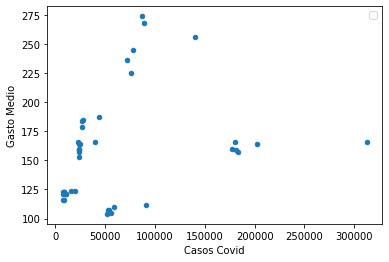

In [12]:
df[['Casos Covid', 'Gasto Medio']].plot.scatter('Casos Covid', 'Gasto Medio')
plt.legend()

In [13]:
import seaborn as sns 

Casos Covid
Tem. Media
Gasto Medio


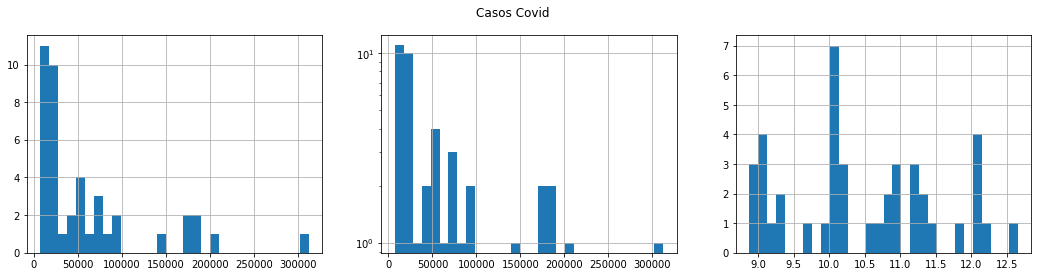

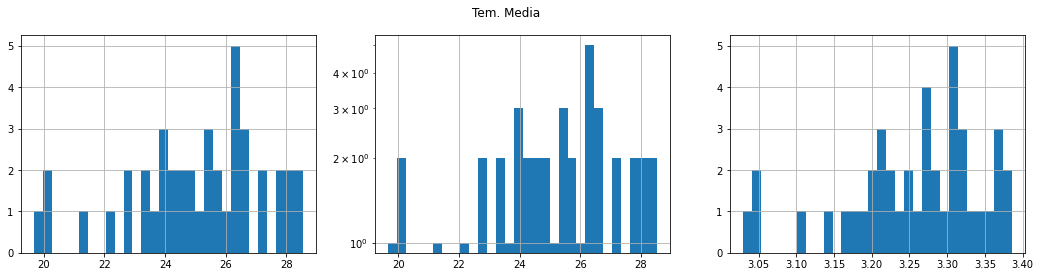

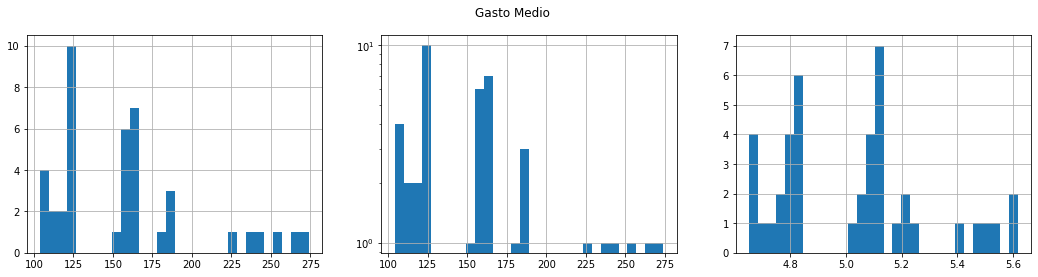

In [14]:
for var in num_vars:
  print(var)
#  display(df[var].describe())
  fig, ax = plt.subplots(1,3,figsize=(18,4))
  df[var].hist(bins=30, ax=ax[0])
  df[var].hist(bins=30, log=True, ax=ax[1])
  np.log(df[var]+1).hist(bins=30,ax=ax[2])
  plt.suptitle(var)

In [15]:
df[num_vars].head(2)

,Casos Covid,Tem. Media,Gasto Medio
0,177644,20.14,160
1,180192,22.78,166


<AxesSubplot:>

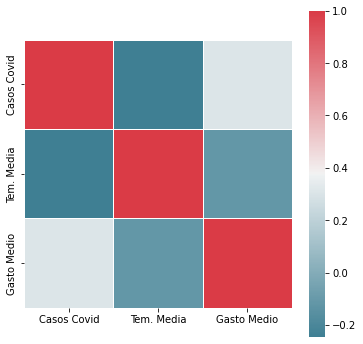

In [16]:
# Compute the correlation matrix
corr = df[num_vars].corr(method='pearson') # Pearson (linear), Spearman (non linear)

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmax=1,
            square=True, linewidths=.5)

In [17]:
corr

,Casos Covid,Tem. Media,Gasto Medio
Casos Covid,1.000000,-0.245516,0.304901
Tem. Media,-0.245516,1.000000,-0.116616
Gasto Medio,0.304901,-0.116616,1.000000


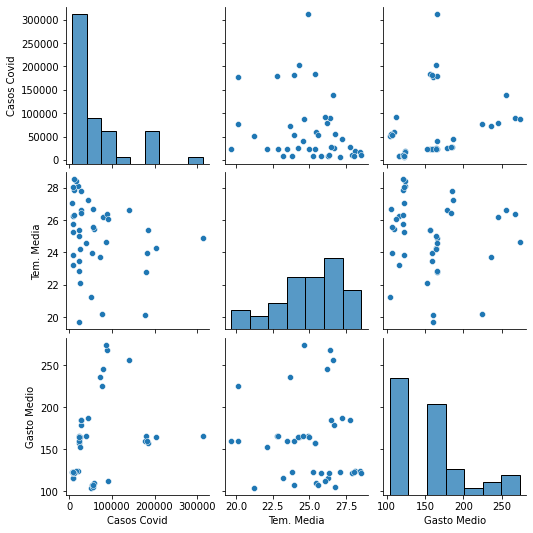

In [18]:
sns.pairplot(df[num_vars])

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
df.columns

Index(['Grupo', 'Casos Covid', 'Tem. Media', 'Gasto Medio'], dtype='object')

In [21]:
df.head()

,Grupo,Casos Covid,Tem. Media,Gasto Medio
0,Barcelona-2022-6-1,177644,20.14,160
1,Barcelona-2022-6-2,180192,22.78,166
2,Barcelona-2022-7-1,202880,24.28,164
3,Barcelona-2022-7-2,312793,24.89,166
4,Barcelona-2022-8-1,183761,25.41,157


In [22]:
selected_features = ['Casos Covid', 'Tem. Media', 'Gasto Medio']

In [23]:
df.loc[:, selected_features].head()

,Casos Covid,Tem. Media,Gasto Medio
0,177644,20.14,160
1,180192,22.78,166
2,202880,24.28,164
3,312793,24.89,166
4,183761,25.41,157


In [24]:
# Filter the selected data for clustering
clustering_data = df.loc[:, selected_features].copy()

# Prepare the original dataset to 
original_data = df.loc[:, selected_features].copy()

In [25]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
clustering_data = pd.DataFrame(min_max_scaler.fit_transform(clustering_data),columns = original_data.columns)

In [26]:
clustering_data.head()

,Casos Covid,Tem. Media,Gasto Medio
0,0.115656,-0.896045,-0.341176
1,0.132329,-0.299435,-0.270588
2,0.280787,0.039548,-0.294118
3,1.000000,0.177401,-0.270588
4,0.155682,0.294915,-0.376471


##KMEANS

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=666)
km = km.fit(clustering_data)
km

KMeans(n_clusters=2, random_state=666)

In [28]:
clustering_data.head()

,Casos Covid,Tem. Media,Gasto Medio
0,0.115656,-0.896045,-0.341176
1,0.132329,-0.299435,-0.270588
2,0.280787,0.039548,-0.294118
3,1.000000,0.177401,-0.270588
4,0.155682,0.294915,-0.376471


In [29]:
km.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'feature_names_in_', 'n_features_in_', '_n_init', '_tol', '_algorithm', '_n_threads', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

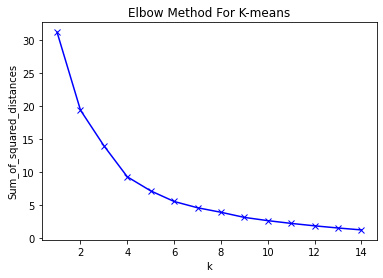

In [30]:
from sklearn.cluster import KMeans
distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=666)
    km = km.fit(clustering_data)
    distances.append(km.inertia_)
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For K-means')
plt.show()

In [31]:
# Define the number of clusters
n_clusters = 2

In [32]:
# Create the clustering algorithm
clustering = KMeans(n_clusters = n_clusters, random_state=666)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data)

In [33]:
clustering_data.head(2)

,Casos Covid,Tem. Media,Gasto Medio
0,0.115656,-0.896045,-0.341176
1,0.132329,-0.299435,-0.270588


In [34]:
clustering_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))
original_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))

In [35]:
clustering_data.head()

,Casos Covid,Tem. Media,Gasto Medio,cluster
0,0.115656,-0.896045,-0.341176,Cluster 1
1,0.132329,-0.299435,-0.270588,Cluster 1
2,0.280787,0.039548,-0.294118,Cluster 1
3,1.000000,0.177401,-0.270588,Cluster 1
4,0.155682,0.294915,-0.376471,Cluster 1


In [36]:
original_data_with_name = original_data.merge(df[['Grupo']], left_index=True, right_index=True)
clusters1 = original_data_with_name.sort_values('cluster')
clusters1.head()

,Casos Covid,Tem. Media,Gasto Medio,cluster,Grupo
0,177644,20.14,160,Cluster 1,Barcelona-2022-6-1
17,86494,24.67,274,Cluster 1,Madrid-2022-8-2
16,88708,26.38,268,Cluster 1,Madrid-2022-8-1
15,139721,26.60,256,Cluster 1,Madrid-2022-7-2
14,77946,26.18,245,Cluster 1,Madrid-2022-7-1


In [37]:
# Guardamos el resultado en un fichero csv separado por comas. 
clusters1.to_csv('clusters1.csv',  index=False, sep=",", decimal=".")

In [38]:
clustering_data['cluster'].value_counts()

Cluster 2    29
Cluster 1    13
Name: cluster, dtype: int64

##Clustering Explanation

In [39]:
from scipy import stats

In [40]:
# Fix the number of cuts selected per feature
selected_cuts = 100

In [41]:
def color_explanation(cut, factor=1):
    palette = sns.color_palette('Blues', selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

In [42]:
mean_data = original_data.groupby('cluster').mean()
feature_explanation = pd.DataFrame()

# Translate to the selected number of cuts
for feature in mean_data.columns:    
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature]
    for cluster in mean_data.index:                
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster])
        cut = np.ceil((percentile / 100) * selected_cuts)
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

C:\Users\ajean\AppData\Local\Temp\ipykernel_19584\4069268175.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_values = pd.Series(data=None, index=mean_data.index)


,Cluster 1,Cluster 2
Casos Covid,84.000000,50.000000
Gasto Medio,86.000000,43.000000
Tem. Media,24.000000,58.000000


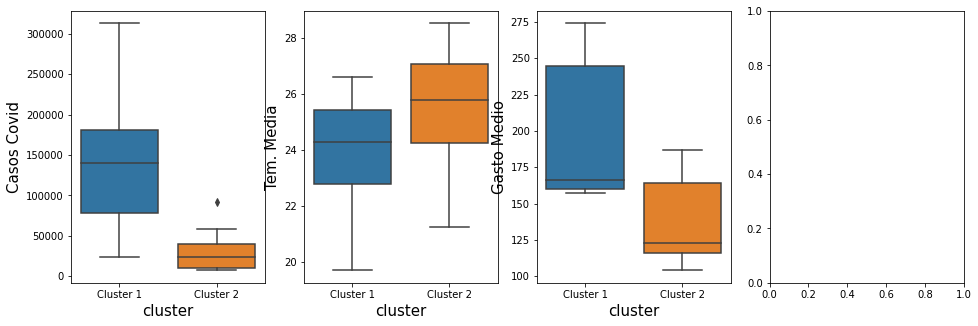

In [43]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
for i,col in enumerate(selected_features[:4]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()

In [44]:
original_data.head()

,Casos Covid,Tem. Media,Gasto Medio,cluster
0,177644,20.14,160,Cluster 1
1,180192,22.78,166,Cluster 1
2,202880,24.28,164,Cluster 1
3,312793,24.89,166,Cluster 1
4,183761,25.41,157,Cluster 1


<AxesSubplot:xlabel='Casos Covid', ylabel='Tem. Media'>

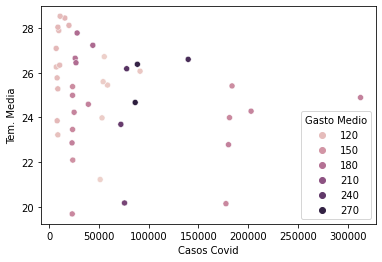

In [45]:
sns.scatterplot(data=original_data, x="Casos Covid", y="Tem. Media", hue="Gasto Medio")

In [46]:
# Guardamos el resultado en un fichero csv separado por comas. 
original_data.to_csv('clusters.csv',  index=False, sep=",", decimal=".")

##AgglomerativeClustering

In [47]:
from  sklearn.cluster import AgglomerativeClustering

In [48]:
#Filter the selected data for clustering
clustering_data = df.loc[:, selected_features].copy()

# Prepare the original dataset to 
original_data = df.loc[:, selected_features].copy()

In [49]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
clustering_data = pd.DataFrame(min_max_scaler.fit_transform(clustering_data),columns = original_data.columns)

In [50]:
K = 3
km = AgglomerativeClustering(n_clusters=3)
km = km.fit(clustering_data)

In [51]:
km.__dict__.keys()

dict_keys(['n_clusters', 'distance_threshold', 'memory', 'connectivity', 'compute_full_tree', 'linkage', 'affinity', 'compute_distances', 'feature_names_in_', 'n_features_in_', 'children_', 'n_connected_components_', 'n_leaves_', 'n_clusters_', 'labels_'])

In [52]:
km.linkage

'ward'

In [53]:
# Define the number of clusters
n_clusters = 3

In [54]:
# Create the clustering algorithm
clustering = AgglomerativeClustering(n_clusters = n_clusters)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data)

In [55]:
clustering_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))
original_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))

In [56]:
clustering_data['cluster'].value_counts()

Cluster 2    18
Cluster 3    14
Cluster 1    10
Name: cluster, dtype: int64

##Clustering Explanation

In [57]:
# Fix the number of cuts selected per feature
selected_cuts = 100

In [58]:
def color_explanation(cut, factor=1):
    palette = sns.color_palette('Blues', selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

In [59]:
mean_data = original_data.groupby('cluster').mean()
feature_explanation = pd.DataFrame()

# Translate to the selected number of cuts
for feature in mean_data.columns:    
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature]
    for cluster in mean_data.index:                
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster])
        cut = np.ceil((percentile / 100) * selected_cuts)
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

C:\Users\ajean\AppData\Local\Temp\ipykernel_19584\4069268175.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_values = pd.Series(data=None, index=mean_data.index)


,Cluster 1,Cluster 2,Cluster 3
Casos Covid,86.000000,50.000000,55.000000
Gasto Medio,86.000000,43.000000,43.000000
Tem. Media,41.000000,81.000000,15.000000


In [60]:
selected_features

['Casos Covid', 'Tem. Media', 'Gasto Medio']

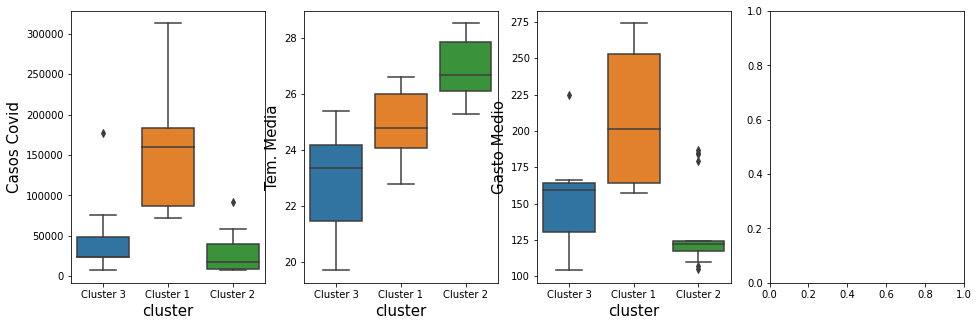

In [61]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
for i,col in enumerate(selected_features[:4]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()